### Notebook of the Capstone Project: 
## Analysis of the comorbidities associated with the COVID-19 pandemic in Mexico and hospital availability in CDMX.

Import libraries and packages

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge bs4 --yes
#from bs4 import BeautifulSoup

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from sklearn.preprocessing import StandardScaler

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [3]:
from geopy.geocoders import Nominatim
from datetime import datetime
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

Get data from https://www.gob.mx/salud/documentos/datos-abiertos-152127

In [4]:
#!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
#!wget -q -O 'MXCovid19_data.json'
#print('Data downloaded!')

MX_data = pd.read_csv('casos-asociados-a-covid-19.csv',sep = ';')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (30,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
MX_data.shape

(384283, 40)

In [7]:
MX_data.shape
MX_data.groupby('num_fallecidos').head(3)

,FECHA ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD UNIDAD MEDICA,SEXO,ENTIDAD NACIMIENTO,ENTIDAD RESIDENCIA,MUNICIPIO RESIDENCIA,TIPO PACIENTE,FECHA INGRESO,FECHA SINTOMAS,FECHA DEFUNCION,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA LENGUA INDIGENA,DIABETES,EPOC,ASMA,INMUNOSUPRESION,HIPERTENSION,OTRA COMPLICACION,CARDIOVASCULAR,OBESIDAD,RENAL CRONICA,TABAQUISMO,OTRO CASO,Negativo,MIGRANTE,PAIS NACIONALIDAD,PAIS ORIGEN,UNIDAD DE CUIDADOS INTENSIVOS,RANGO EDAD,num_fallecidos,num_hospitalizados,positivo,pendiente
0,2020-06-23,1a7a11,FUERA DE USMER,IMSS,NUEVO LEÓN,MUJER,NUEVO LEÓN,NUEVO LEÓN,NaN,AMBULATORIO,2020-06-02,2020-05-23,NaN,NO APLICA,NO,49,MEXICANA,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO ESPECIFICADO,NaN,NO ESPECIFICADO,México,99,NO APLICA,41-50,NaN,NaN,Positivo SARS-CoV-2,NaN
1,2020-06-23,097494,USMER,SSA,PUEBLA,MUJER,PUEBLA,PUEBLA,NaN,AMBULATORIO,2020-06-18,2020-06-16,NaN,NO APLICA,NO,29,MEXICANA,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,NaN,NO ESPECIFICADO,México,99,NO APLICA,21-30,NaN,NaN,Positivo SARS-CoV-2,NaN
2,2020-06-23,1e7841,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Azcapotzalco,AMBULATORIO,2020-06-18,2020-06-15,NaN,NO APLICA,NO,41,MEXICANA,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,NaN,NO ESPECIFICADO,México,99,NO APLICA,41-50,NaN,NaN,Positivo SARS-CoV-2,NaN
3,2020-06-23,116bfa,USMER,SSA,BAJA CALIFORNIA,MUJER,BAJA CALIFORNIA,BAJA CALIFORNIA,Azcapotzalco,HOSPITALIZADO,2020-04-25,2020-04-22,2020-05-02,NO,SI,51,MEXICANA,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NaN,NO ESPECIFICADO,México,99,NO,51-60,1.0,1.0,Positivo SARS-CoV-2,NaN
11,2020-06-23,0423fc,USMER,SSA,QUERÉTARO,HOMBRE,QUERÉTARO,QUERÉTARO,Miguel Hidalgo,HOSPITALIZADO,2020-05-01,2020-04-29,2020-05-11,SI,SI,60,MEXICANA,NO APLICA,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NaN,NO ESPECIFICADO,México,99,NO,51-60,1.0,1.0,Positivo SARS-CoV-2,NaN
15,2020-06-23,13238b,USMER,IMSS,BAJA CALIFORNIA,HOMBRE,CIUDAD DE MÉXICO,BAJA CALIFORNIA,Azcapotzalco,HOSPITALIZADO,2020-06-11,2020-06-08,2020-06-14,NO,SI,51,MEXICANA,NO APLICA,NO,NO,SI,NO,NO,SI,SI,NO,SI,NO,NO,NO ESPECIFICADO,NaN,NO ESPECIFICADO,México,99,NO,51-60,1.0,1.0,Positivo SARS-CoV-2,NaN


Cleaning and completing data

In [8]:
MX_data = MX_data[MX_data['positivo'].notnull()]
MX_df = MX_data[['ENTIDAD RESIDENCIA','FECHA SINTOMAS', 'SEXO', 'RANGO EDAD', 'DIABETES', 'EPOC', 'ASMA', 
                 'INMUNOSUPRESION', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL CRONICA', 'TABAQUISMO', 
                 'num_hospitalizados', 'num_fallecidos']]
MX_df.rename(columns={'ENTIDAD RESIDENCIA': 'State','FECHA SINTOMAS': 'Symptom_date', 'SEXO' :'Sex', 'RANGO EDAD':'Age', 
                      'DIABETES':'Diabetes', 'EPOC': 'COPD', 'ASMA':'Asthma', 'INMUNOSUPRESION':'Immunosup.', 
                      'HIPERTENSION': 'Hypertension', 'CARDIOVASCULAR': 'CVD', 'OBESIDAD':'Obesity', 'RENAL CRONICA':'CKD', 
                      'TABAQUISMO':'Smoking','num_hospitalizados':'Hospitalized', 'num_fallecidos':'Dead'}, inplace=True)


MX_df.replace('MÉXICO', 'ESTADO DE MÉXICO' , inplace=True) 
MX_df.replace('NO',0 , inplace=True) 
MX_df.replace('SI', 1 , inplace=True) 
MX_df.replace(np.nan, 0 , inplace=True) 
MX_df.replace('SE IGNORA', 0.5 , inplace=True) 


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [9]:
MX_df.head()

#MX_df.shape

,State,Symptom_date,Sex,Age,Diabetes,COPD,Asthma,Immunosup.,Hypertension,CVD,Obesity,CKD,Smoking,Hospitalized,Dead
0,NUEVO LEÓN,2020-05-23,MUJER,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PUEBLA,2020-06-16,MUJER,21-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,CIUDAD DE MÉXICO,2020-06-15,MUJER,41-50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,BAJA CALIFORNIA,2020-04-22,MUJER,51-60,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,CHIHUAHUA,2020-06-07,HOMBRE,51-60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Add a new field 'Days' to analyze the evolution of pandemic since the beginning

In [10]:
MX_df["Symptom_date"]=pd.to_datetime(MX_df["Symptom_date"], infer_datetime_format=True)
today=datetime.datetime(2020, 6, 23)

MX_df['Days'] = (today-MX_df['Symptom_date'])
MX_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State,Symptom_date,Sex,Age,Diabetes,COPD,Asthma,Immunosup.,Hypertension,CVD,Obesity,CKD,Smoking,Hospitalized,Dead,Days
0,NUEVO LEÓN,2020-05-23,MUJER,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31 days
1,PUEBLA,2020-06-16,MUJER,21-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7 days
2,CIUDAD DE MÉXICO,2020-06-15,MUJER,41-50,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8 days
3,BAJA CALIFORNIA,2020-04-22,MUJER,51-60,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,62 days
4,CHIHUAHUA,2020-06-07,HOMBRE,51-60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16 days


Getting the datasets containing only the hospitalized and dead cases.

In [11]:
mx_hosp = MX_df[MX_df['Hospitalized']==1.0]
mx_death = MX_df[MX_df['Dead']==1.0]
mx_death.count()

State           20852
Symptom_date    20852
Sex             20852
Age             20852
Diabetes        20852
COPD            20852
Asthma          20852
Immunosup.      20852
Hypertension    20852
CVD             20852
Obesity         20852
CKD             20852
Smoking         20852
Hospitalized    20852
Dead            20852
Days            20852
dtype: int64

In [13]:
hosp_day=mx_hosp[['Days','State']].groupby('Days').count().iloc[::-1].reset_index()
hosp_day.drop(index=0, inplace=True)
hosp_day.drop(index=1, inplace=True)
hosp_day['Days'] =hosp_day.index-1
hosp_day.rename(columns={"State": "New infected"}, inplace=True)
hosp_day.head(10)

,Days,New infected
2,1,1
3,2,1
4,3,1
5,4,2
6,5,1
7,6,4
8,7,2
9,8,1
10,9,2
11,10,2


Plotting the number of new hospitalized patients per every day.

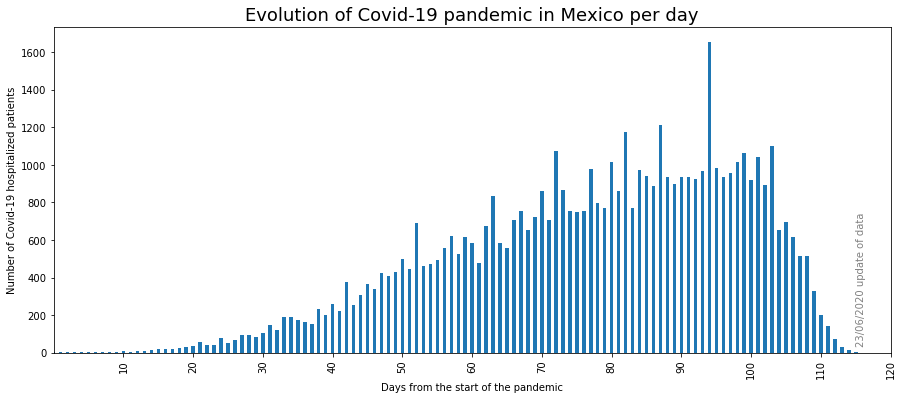

In [14]:
hosp_day['New infected'].plot(kind='bar', figsize=(15, 6))
plt.xlabel('Days from the start of the pandemic') # add to x-label to the plot
plt.ylabel('Number of Covid-19 hospitalized patients') # add y-label to the plot
plt.title('Evolution of Covid-19 pandemic in Mexico per day', fontsize=18) # add title to the plot
plt.xlim(0,120)
xticks = [10, 20, 30, 40, 50, 60, 70, 80, 90,100,110,120]
ticklabels = [10, 20, 30, 40, 50, 60, 70, 80, 90,100,110,120]
plt.xticks(xticks, ticklabels)
plt.annotate('23/06/2020 update of data', # text to display
             xy=(115, 35),                    # start the text at at point (year 2008 , pop 30)
             rotation=90,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
             color='gray'
            )

#plt.show()
plt.savefig('evolution.png')
#df.iloc[::-1]
#mx_death[['days','state']].groupby('days').count()

Exploratory data analysis of the main comorbidities associated to the coronavirus pandemic in Mexico

In [15]:
comorbidities=['Diabetes',  'COPD', 'Asthma', 'Immunosup.', 'Hypertension',  'CVD','Obesity', 'CKD', 
              'Smoking']
cols=['Positive','Hospitalized','Dead']
comorb = pd.DataFrame(columns = cols)
#print(mx_hosp['Asthma'].sum(), mx_death['Asthma'].sum())
comorb['Positive']= round((MX_df[comorbidities].sum()/MX_df.shape[0])*100, 2)
comorb['Hospitalized']=round((mx_hosp[comorbidities].sum()/mx_hosp.shape[0])*100, 2)
comorb['Dead']= round((mx_death[comorbidities].sum()/mx_death.shape[0])*100, 2)
comorb


,Positive,Hospitalized,Dead
Diabetes,16.69,30.84,37.22
COPD,1.98,3.90,5.36
Asthma,2.96,2.59,2.33
Immunosup.,1.62,2.86,3.27
Hypertension,20.34,34.23,42.34
CVD,2.58,4.51,5.76
Obesity,19.92,23.83,25.45
CKD,2.39,5.06,7.04
Smoking,8.11,8.57,9.10


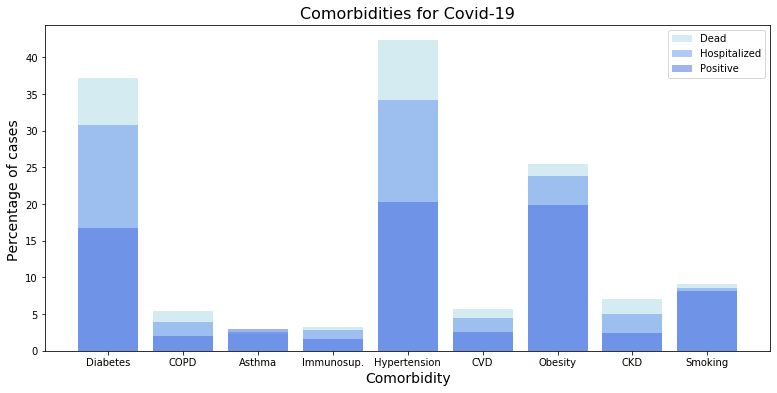

In [16]:
plt.figure(figsize=(13,6))
#plt.bar(comorb.index,comorb['Positive'] , alpha=0.5, label="Positive",color='navy')#'dimgray')
plt.bar(comorb.index,comorb['Dead'], alpha=0.5, label="Dead", color='lightblue')#'lightgray')
plt.bar(comorb.index,comorb['Hospitalized'], alpha=0.5, label="Hospitalized", color='cornflowerblue')#'darkgray')
#plt.bar(comorb.index,comorb['Dead'], alpha=0.5, label="Dead", color='lightblue')#'lightgray')
plt.bar(comorb.index,comorb['Positive'] , alpha=0.5, label="Positive",color='royalblue')#'dimgray')
plt.xlabel("Comorbidity", size=14)
plt.ylabel("Percentage of cases ", size=14)
plt.title("Comorbidities for Covid-19", size=16)
plt.legend(loc='upper right')
plt.savefig('comorbidities.png')
#plt.savefig("overlapping_histograms_with_matplotlib_Python.png")


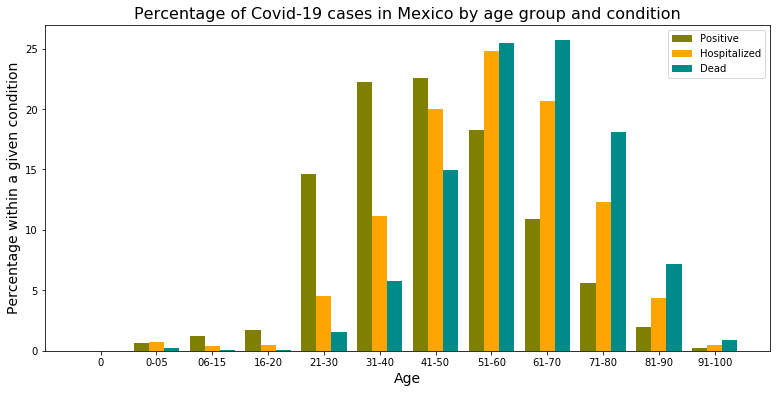

In [17]:
labels = MX_df.groupby('Age').count().index
x = np.arange(len(labels))  # the label locations
width = 0.27  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, 100*(MX_df.groupby('Age').count()['State'])/MX_df.shape[0], width, label='Positive', color='olive')
rects2 = ax.bar(x , 100*(mx_hosp.groupby('Age').count()['State'])/mx_hosp.shape[0], width, label='Hospitalized',color='orange')
rects3 = ax.bar(x + width, 100*(mx_death.groupby('Age').count()['State'])/mx_death.shape[0], width, label='Dead',color='darkcyan')
#rects3 = ax.bar(x + width, 100*(mx_death[mx_death['Sex']=='HOMBRE'].groupby('Age').count()['State'])/mx_death[mx_death['Sex']=='HOMBRE'].shape[0], width, label='Dead',color='darkcyan')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.set_size_inches(13, 6)
ax.set_ylabel('Percentage within a given condition', size=14)
ax.set_xlabel('Age',size=14)
ax.set_title('Percentage of Covid-19 cases in Mexico by age group and condition',size=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.savefig('condition_age.png', bbox_inches='tight')

In [18]:
(mx_death.groupby('Age').count())/mx_death.shape[0]

,State,Symptom_date,Sex,Diabetes,COPD,Asthma,Immunosup.,Hypertension,CVD,Obesity,CKD,Smoking,Hospitalized,Dead,Days
Age,,,,,,,,,,,,,,,
0,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144,0.000144
0-05,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254,0.002254
06-15,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055,0.001055
16-20,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007,0.001007
21-30,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298,0.015298
31-40,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932,0.057932
41-50,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722,0.149722
51-60,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316,0.254316
61-70,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954,0.256954


In [19]:
MX_df.shape
states = pd.unique(MX_df['State'])
states

array(['NUEVO LEÓN', 'PUEBLA', 'CIUDAD DE MÉXICO', 'BAJA CALIFORNIA',
       'CHIHUAHUA', 'QUERÉTARO', 'ESTADO DE MÉXICO',
       'VERACRUZ DE IGNACIO DE LA LLAVE', 'TAMAULIPAS', 'TABASCO',
       'YUCATÁN', 'SONORA', 'QUINTANA ROO', 'MICHOACÁN DE OCAMPO',
       'COAHUILA DE ZARAGOZA', 'GUERRERO', 'JALISCO', 'HIDALGO', 'OAXACA',
       'SINALOA', 'ZACATECAS', 'AGUASCALIENTES', 'DURANGO', 'MORELOS',
       'CHIAPAS', 'GUANAJUATO', 'SAN LUIS POTOSÍ', 'TLAXCALA', 'NAYARIT',
       'CAMPECHE', 'BAJA CALIFORNIA SUR', 'COLIMA'], dtype=object)

Getting the coordinates 

In [20]:
states_coords=[]
geolocator = Nominatim(user_agent="ny_explorer")
for s in range(len(states)):
    address = states[s]
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    states_coords.append([states[s],latitude, longitude])



In [21]:
states_coords=pd.DataFrame(states_coords)
states_coords.columns=['State', 'latitude', 'longitude']
states_coords

,State,latitude,longitude
0,NUEVO LEÓN,26.238436,-99.887300
1,PUEBLA,18.833333,-98.000000
2,CIUDAD DE MÉXICO,19.432630,-99.133178
3,BAJA CALIFORNIA,30.033892,-115.142511
4,CHIHUAHUA,28.500000,-106.000000
5,QUERÉTARO,20.854257,-99.847560
6,ESTADO DE MÉXICO,19.483945,-99.689972
7,VERACRUZ DE IGNACIO DE LA LLAVE,19.333333,-96.666667
8,TAMAULIPAS,23.989155,-98.702682
9,TABASCO,17.950786,-92.483122


In [22]:
address = 'ZACATECAS'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico are 23.0000001, -103.0000001.


In [23]:
# create map of Mexico using latitude and longitude values
map_mexico = folium.Map(location=[latitude, longitude], zoom_start=5)

# add markers to map
for lat, lng, label in zip(states_coords['latitude'], states_coords['longitude'], states_coords['State']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mexico)  
    
map_mexico

In [24]:
#comorbidities=['State','Diabetes',  'COPD', 'Asthma', 'Immunosup.', 'Hypertension',  'CVD','Obesity', 'CKD', 
#              'Smoking', 'Hospitalized','Dead']
comorbidities=['State','Diabetes',  'COPD', 'Immunosup.', 'Hypertension',  'CVD','Obesity', 'CKD', 
               'Hospitalized','Dead']

mx_grouped = MX_df[comorbidities].groupby('State').mean().reset_index()
mx_hosp_grouped =mx_hosp[comorbidities].groupby('State').mean().reset_index()
mx_death_grouped =mx_death[comorbidities].groupby('State').mean().reset_index()

aux=mx_death_grouped

In [35]:
aux.sort_values(by=['Immunosup.'])

,State,Diabetes,COPD,Immunosup.,Hypertension,CVD,Obesity,CKD,Hospitalized,Dead,label
16,MORELOS,0.401421,0.062167,0.008881,0.410302,0.040853,0.222025,0.078153,0.909414,1.0,2
9,DURANGO,0.465347,0.138614,0.009901,0.514851,0.069307,0.242574,0.099010,0.861386,1.0,4
13,HIDALGO,0.410678,0.080082,0.010267,0.398357,0.043121,0.314168,0.069815,0.909651,1.0,2
4,CHIAPAS,0.405585,0.047872,0.017287,0.494681,0.035904,0.260638,0.087766,0.893617,1.0,0
28,TLAXCALA,0.398406,0.085657,0.019920,0.292829,0.015936,0.320717,0.047809,0.816733,1.0,2
26,TABASCO,0.391119,0.029197,0.021898,0.457421,0.053528,0.329075,0.049878,0.772506,1.0,0
15,MICHOACÁN DE OCAMPO,0.362500,0.086111,0.022222,0.450000,0.072222,0.323611,0.065278,0.866667,1.0,2
8,COLIMA,0.363636,0.022727,0.022727,0.454545,0.000000,0.318182,0.113636,0.977273,1.0,0
29,VERACRUZ DE IGNACIO DE LA LLAVE,0.395406,0.039377,0.026251,0.452830,0.051272,0.263331,0.078343,0.904020,1.0,0
30,YUCATÁN,0.382060,0.054817,0.028239,0.473422,0.073090,0.232558,0.068106,0.883721,1.0,0


In [25]:
def most_common_desease(row):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:]

In [26]:
indicators = ['st', 'nd', 'rd']
num=7
#aux=mx_grouped
# create columns according to number of top venues
columns = ['State']
for ind in np.arange(num):
    try:
        columns.append('{}{} Most Common Comorbidity'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Comorbidity'.format(ind+1))

# create a new dataframe
states_deseases_sorted = pd.DataFrame(columns=columns)
states_deseases_sorted['State'] = aux['State']

for ind in np.arange(aux.shape[0]):
    states_deseases_sorted.iloc[ind, 1:] = most_common_desease(aux.iloc[ind, :num+1])

states_deseases_sorted.head(32)

,State,1st Most Common Comorbidity,2nd Most Common Comorbidity,3rd Most Common Comorbidity,4th Most Common Comorbidity,5th Most Common Comorbidity,6th Most Common Comorbidity,7th Most Common Comorbidity
0,AGUASCALIENTES,Hypertension,Diabetes,Obesity,CKD,CVD,Immunosup.,COPD
1,BAJA CALIFORNIA,Hypertension,Diabetes,Obesity,CKD,CVD,COPD,Immunosup.
2,BAJA CALIFORNIA SUR,Hypertension,Diabetes,Obesity,Immunosup.,COPD,CVD,CKD
3,CAMPECHE,Hypertension,Diabetes,Obesity,CKD,CVD,Immunosup.,COPD
4,CHIAPAS,Hypertension,Diabetes,Obesity,CKD,COPD,CVD,Immunosup.
5,CHIHUAHUA,Hypertension,Diabetes,Obesity,CVD,CKD,COPD,Immunosup.
6,CIUDAD DE MÉXICO,Hypertension,Diabetes,Obesity,CKD,COPD,CVD,Immunosup.
7,COAHUILA DE ZARAGOZA,Hypertension,Diabetes,Obesity,CKD,CVD,Immunosup.,COPD
8,COLIMA,Hypertension,Diabetes,Obesity,CKD,Immunosup.,COPD,CVD
9,DURANGO,Hypertension,Diabetes,Obesity,COPD,CKD,CVD,Immunosup.


In [36]:
X = aux.values[:,1:num+1]
#X = aux.values[:,1:8]
#cluster_dataset=X

In [37]:
#X = aux.values[:,1:9]
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.28614824, -0.19848821,  2.32485407,  0.71481217,  1.52458545,
        -0.94674546,  3.76335198],
       [ 1.09226712, -0.91683548, -0.41534893,  0.91024964, -0.23105975,
        -2.04216416, -0.59056818],
       [ 0.89955988,  0.87306756,  2.18081842,  0.48536729,  0.31010569,
         1.62319627, -0.82880239],
       [ 0.07887317, -0.52420371,  1.03871211, -0.38432895,  0.74639586,
         0.78661349,  0.05903553],
       [ 0.31228324, -0.55275754, -0.89670595,  0.53763795, -1.02819875,
        -0.42835352,  0.00994055],
       [-0.49238405, -0.85788191, -0.1664425 ,  0.92607673,  0.43879045,
         0.08215223, -0.74916031],
       [-1.74548782, -0.3307909 , -0.07761536, -1.27528392, -0.44883322,
        -0.69465974, -0.58147389],
       [-1.20786391, -0.54007007,  1.19778467,  0.1116553 ,  0.29654202,
        -0.54602667,  0.67573716],
       [-1.04551627, -1.34336507, -0.67622436, -0.1272176 , -2.21854993,
         0.81048118,  0.77279664],
       [ 2.24664486,  2.3003

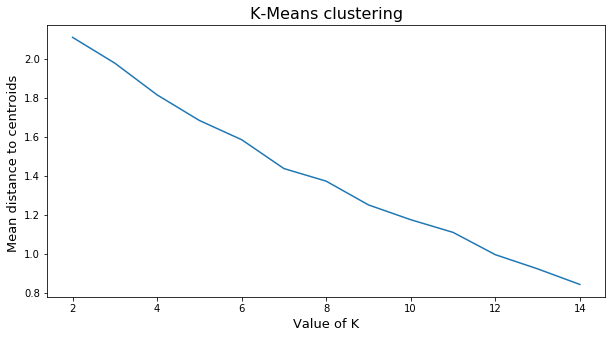

In [40]:
mean_dist=[]
sticks=[]
max_clust=15
#k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=12)
#k_means.fit(cluster_dataset)
#labels = k_means.labels_
#centroids = km.cluster_centers_

for i in range(2,max_clust):
    k_means = KMeans(init="k-means++", n_clusters = i, n_init=12)
    k_means.fit(cluster_dataset)
    labels = k_means.labels_
    centroids = k_means.cluster_centers_
    sum=0
    for j in range(labels.shape[0]):
        dist = np.linalg.norm(cluster_dataset[j]-centroids[labels[j]])
        sum = sum + dist
    mean_dist.append(sum/labels.shape[0])
    sticks.append(i)
mean_dist    
plt.figure(figsize=(10,5))
plt.plot(sticks,mean_dist)    
plt.xlabel("Value of K", size=13)
plt.ylabel("Mean distance to centroids ", size=13)
plt.title("K-Means clustering", size=16)
plt.savefig('Number_clusters.png')

In [44]:
kclusters = 5

k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=20)
k_means.fit(cluster_dataset)
labels = k_means.labels_
aux['label']=labels
centroids = k_means.cluster_centers_
labels

array([4, 1, 2, 1, 1, 1, 0, 1, 1, 3, 0, 3, 1, 0, 3, 1, 0, 4, 3, 0, 0, 1,
       1, 3, 1, 1, 1, 1, 0, 1, 1, 2], dtype=int32)

In [45]:
aux_merged = aux

# merge aux with toronto_data to add latitude/longitude for each state
aux_merged = aux_merged.join(states_coords.set_index('State'), on='State')

aux_merged.sort_values(by='Obesity').head(32) # check the last columns!

,State,Diabetes,COPD,Immunosup.,Hypertension,CVD,Obesity,CKD,Hospitalized,Dead,label,latitude,longitude
1,BAJA CALIFORNIA,0.429682,0.036293,0.029164,0.517174,0.059948,0.185677,0.067401,0.972780,1.0,1,30.033892,-115.142511
12,GUERRERO,0.390603,0.069425,0.032959,0.441094,0.053997,0.214586,0.066620,0.931276,1.0,1,17.666667,-100.000000
16,MORELOS,0.401421,0.062167,0.008881,0.410302,0.040853,0.222025,0.078153,0.909414,1.0,0,18.750000,-99.000000
10,ESTADO DE MÉXICO,0.322090,0.046578,0.032493,0.329627,0.044724,0.226093,0.051520,0.926118,1.0,0,19.483945,-99.689972
30,YUCATÁN,0.382060,0.054817,0.028239,0.473422,0.073090,0.232558,0.068106,0.883721,1.0,1,20.684596,-88.875567
0,AGUASCALIENTES,0.387097,0.059140,0.096774,0.505376,0.112903,0.236559,0.215054,0.903226,1.0,4,22.000000,-102.500000
9,DURANGO,0.465347,0.138614,0.009901,0.514851,0.069307,0.242574,0.099010,0.861386,1.0,3,24.833333,-104.833333
6,CIUDAD DE MÉXICO,0.342011,0.054932,0.037497,0.385240,0.053380,0.248268,0.067710,0.884404,1.0,0,19.432630,-99.133178
21,QUERÉTARO,0.387755,0.066327,0.051020,0.459184,0.079082,0.252551,0.107143,0.943878,1.0,1,20.854257,-99.847560
22,QUINTANA ROO,0.414286,0.032967,0.031868,0.461538,0.047253,0.254945,0.103297,0.956044,1.0,1,19.666667,-88.500000


In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(aux_merged['latitude'], aux_merged['longitude'], aux_merged['State'], aux_merged['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [47]:
CLIENT_ID = 'MRDXJLT50POAARNN5GMIRQEJPFL4KUZI1W04ZTBZZWCOQZSB' # your Foursquare ID
CLIENT_SECRET = 'FCWGSZ5CSGGXAK2VFBNDTECV2HUTST40BCMODVW4JKHPF5HO' # your Foursquare Secret
#VERSION = '20180604'
VERSION = '20200303'
LIMIT = 100
search_query = 'hospital'
radius = 2000
category='4bf58dd8d48988d196941735'

In [48]:
address = 'coyoacan'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.32804005 -99.15106340693589


In [49]:
#url = 'https://api.foursquare.com/v2/venues/search? client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(category,CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.country,location.formattedAddress,location.address,location.crossStreet,location.postalCode,location.neighborhood,location.city,location.state,venuePage.id
0,565cb271498e51f6e73cc868,Imagenologia Medica Sur,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.332452,-99.155056,"[{'label': 'display', 'lat': 19.33245193078707...",645,MX,México,[México],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,569d4e12498e718d4da30cf0,clinica casa de la mujer,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.327458,-99.150899,"[{'label': 'display', 'lat': 19.32745771886435...",67,MX,México,[México],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4bcb96fb3740b713b9dc6265,Hospital HMG Coyoacán,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.328074,-99.143727,"[{'label': 'display', 'lat': 19.32807388584751...",770,MX,México,[Árbol del Fuego 80 (Entre Suchil y Av. Divisi...,Árbol del Fuego 80,Entre Suchil y Av. División del Norte,04380,El Rosario,Coyoacán,Distrito Federal,NaN
3,501dbf4ee4b04798bc16201a,Humanitas Medical Group,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.332764,-99.146456,"[{'label': 'display', 'lat': 19.33276385007271...",714,MX,México,[México],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4dba0657fa8c2e303f1aea49,Clinica 19 IMSS,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1594742613,False,19.347130,-99.163204,"[{'label': 'display', 'lat': 19.34713015111849...",2478,MX,México,"[Presidente Venustiano Carranza 100, 04100 Coy...",Presidente Venustiano Carranza 100,NaN,04100,NaN,Coyacán,Distrito Federal,NaN
5,514c4e79e4b0692dc58c158e,Cruz Blanca neutral,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.345449,-99.151119,"[{'label': 'display', 'lat': 19.34544948386152...",1938,MX,México,"[Pennsylvania, Ciudad de México, Distrito Fede...",Pennsylvania,NaN,NaN,NaN,Ciudad de México,Distrito Federal,NaN
6,4d40242000e8a35df921f8fa,ISSSTE Clínica de Especialidades,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.345520,-99.145072,"[{'label': 'display', 'lat': 19.34552004345351...",2045,MX,México,"[Calzada de Tlalpan 1983, Ciudad de México, Di...",Calzada de Tlalpan 1983,NaN,NaN,NaN,Ciudad de México,Distrito Federal,NaN
7,4dc17835d4c07bbdf775ba4d,Asociación Para Evitar La Ceguera En México,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.349050,-99.155807,"[{'label': 'display', 'lat': 19.34904951153486...",2391,MX,México,[Vicente García Torres 46 (Callejon San Miguel...,Vicente García Torres 46,Callejon San Miguel,04030,Barrio San Lucas,Coyoacán,Distrito Federal,NaN
8,50eb1f35e4b0674612603422,Clínica de Medicina Familiar Coyoacán ISSSTE,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",v-1594742613,False,19.349595,-99.158442,"[{'label': 'display', 'lat': 19.34959483591423...",2521,MX,México,[Fernández Leal #11 Col. Barrio La Concepción ...,Fernández Leal #11 Col. Barrio La Concepción D...,Miguel Hidalgo,04020,NaN,Ciudad de México,Distrito Federal,NaN
9,530171a5498e080732c5405f,Clinica Integral Coyoacan,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",v-1594742613,False,19.330929,-99.137684,"[{'label': 'display', 'lat': 19.33092939925008...",1441,MX,México,"[Calzada de la Virgen 90 (Esquina Retorno 9), ...",Calzada de la Virgen 90,Esquina Retorno 9,04469,NaN,Ciudad de México,Distrito Federal,NaN


In [50]:
!conda install -c conda-forge lxml --y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-3.8.0                 |           py36_0         3.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               conda-forge/linux-64::lxml-3.8.0-py36_0



lxml-3.8.0           | 3.8 MB    | ##################################### | 100% 
libxslt-1.1.33       | 426 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [51]:
data=pd.read_html('https://es.wikipedia.org/wiki/Demarcaciones_territoriales_de_la_Ciudad_de_M%C3%A9xico')

In [52]:

cdmx=data[1].iloc[3:19,1:3]
cdmx.columns=['Alcaldia','Population']
#cdmx.reset_index(drop=True)
#df.reset_index(drop=True)
cdmx.set_index('Alcaldia', inplace=True)
#cdmx.drop('index', inplace= True)
cdmx.reset_index(inplace=True)
cdmx

,Alcaldia,Population
0,Álvaro Obregón,727034
1,Azcapotzalco,414711
2,Benito Juárez,385439
3,Coyoacán,620416
4,Cuajimalpa de Morelos,186391
5,Cuauhtémoc,531831
6,Gustavo A. Madero,1185772
7,Iztacalco,384326
8,Iztapalapa,1815786
9,Magdalena Contreras,239086


In [53]:

cdmx.shape

(16, 2)

In [54]:
geolocator = Nominatim(user_agent="ny_explorer")
alc_coords=[]
for s in range(cdmx.shape[0]):
    #print(cdmx['Alcaldia'].iloc[s]+' CDMX')
    address ='Centro '+ cdmx['Alcaldia'].iloc[s] + ' CDMX'
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    alc_coords.append([latitude, longitude])
alc_coords
    

[[19.4127725, -99.1186924],
 [19.4837824, -99.1844166],
 [19.3791261, -99.159176],
 [19.360041950000003, -99.17009824918622],
 [19.3635025, -99.2887688],
 [19.4298444, -99.1685043],
 [19.4838614, -99.1134723],
 [19.3962535, -99.0965875],
 [19.3449734, -99.0560877],
 [19.3126287, -99.240412],
 [19.3366248, -99.2145487],
 [19.1864441, -99.0718336],
 [19.2703721, -99.0049033],
 [19.2884203, -99.1670508],
 [19.4192316, -99.1133947],
 [19.2634938, -99.1033663]]

In [55]:
cdmx['latitude']=pd.DataFrame(alc_coords)[0]
cdmx['longitude']=pd.DataFrame(alc_coords)[1]

cdmx['latitude'][0] =19.3899491
cdmx['longitude'][0] =-99.1964014
cdmx['latitude'][10] =19.4072253
cdmx['longitude'][10] =-99.1928727
cdmx['latitude'][11] =19.1919077
cdmx['longitude'][11] =-99.0248583

cdmx

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,Alcaldia,Population,latitude,longitude
0,Álvaro Obregón,727034,19.389949,-99.196401
1,Azcapotzalco,414711,19.483782,-99.184417
2,Benito Juárez,385439,19.379126,-99.159176
3,Coyoacán,620416,19.360042,-99.170098
4,Cuajimalpa de Morelos,186391,19.363502,-99.288769
5,Cuauhtémoc,531831,19.429844,-99.168504
6,Gustavo A. Madero,1185772,19.483861,-99.113472
7,Iztacalco,384326,19.396254,-99.096587
8,Iztapalapa,1815786,19.344973,-99.056088
9,Magdalena Contreras,239086,19.312629,-99.240412


In [56]:

# create map of Mexico using latitude and longitude values
map_cdmx = folium.Map(location=[19.33, -99.15], zoom_start=10.48)

# add markers to map
for lat, lng, label in zip(cdmx['latitude'], cdmx['longitude'], cdmx['Alcaldia']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cdmx)  
    
map_cdmx

In [202]:
cdmx.iloc[0][1]

'727034'

In [57]:
hospitals=[]

for lat, lng in zip(cdmx['latitude'], cdmx['longitude']):
    url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(category,CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = json_normalize(venues)
    hospitals.append(dataframe.shape[0])



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [58]:
hospitals


[48, 34, 48, 49, 27, 50, 50, 28, 26, 48, 48, 2, 4, 49, 49, 18]

In [59]:
cdmx['Hospitals']=hospitals
cdmx['Positive_covid-19']=[3395, 2771,1699, 3065,1045, 2892,6167,2555, 8332, 1287, 1938,1536, 2430, 3768, 2467,3218]
cdmx = cdmx[['Alcaldia', 'latitude','longitude', 'Population', 'Hospitals','Positive_covid-19']]
#pd.to_numeric(cdmx['Population'], errors='coerce')
cdmx['Population'] = pd.to_numeric( cdmx['Population'])
cdmx

,Alcaldia,latitude,longitude,Population,Hospitals,Positive_covid-19
0,Álvaro Obregón,19.389949,-99.196401,727034,48,3395
1,Azcapotzalco,19.483782,-99.184417,414711,34,2771
2,Benito Juárez,19.379126,-99.159176,385439,48,1699
3,Coyoacán,19.360042,-99.170098,620416,49,3065
4,Cuajimalpa de Morelos,19.363502,-99.288769,186391,27,1045
5,Cuauhtémoc,19.429844,-99.168504,531831,50,2892
6,Gustavo A. Madero,19.483861,-99.113472,1185772,50,6167
7,Iztacalco,19.396254,-99.096587,384326,28,2555
8,Iztapalapa,19.344973,-99.056088,1815786,26,8332
9,Magdalena Contreras,19.312629,-99.240412,239086,48,1287


In [73]:
cdmx['ratio'] = 100*cdmx['Hospitals']/cdmx['Positive_covid-19']
cdmx.sort_values(by=['ratio'])

,Alcaldia,latitude,longitude,Population,Hospitals,Positive_covid-19,label,ratio
11,Milpa Alta,19.191908,-99.024858,130582,2,1536,0,0.130208
12,Tláhuac,19.270372,-99.004903,360265,4,2430,0,0.164609
8,Iztapalapa,19.344973,-99.056088,1815786,26,8332,2,0.312050
15,Xochimilco,19.263494,-99.103366,415007,18,3218,3,0.559354
6,Gustavo A. Madero,19.483861,-99.113472,1185772,50,6167,4,0.810767
7,Iztacalco,19.396254,-99.096587,384326,28,2555,3,1.095890
1,Azcapotzalco,19.483782,-99.184417,414711,34,2771,3,1.226994
13,Tlalpan,19.288420,-99.167051,650567,49,3768,1,1.300425
0,Álvaro Obregón,19.389949,-99.196401,727034,48,3395,1,1.413844
3,Coyoacán,19.360042,-99.170098,620416,49,3065,1,1.598695


In [60]:
from scipy import stats
import seaborn as sns

0.978164549466388 5.990588254165147e-11
0.17620090046016804 0.5139049401030621


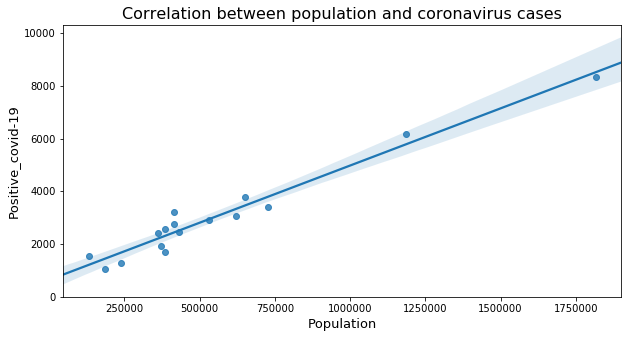

In [61]:
pearson_coef, p_value = stats.pearsonr(cdmx['Population'], cdmx['Positive_covid-19'])
print(pearson_coef, p_value)
pearson_coef, p_value = stats.pearsonr(cdmx['Population'], cdmx['Hospitals'])
print(pearson_coef, p_value)
plt.figure(figsize=(10, 5))
plt.xlabel("Population", size=13)
plt.ylabel("Number of coronavirus positive tests", size=13)
plt.title("Correlation between population and coronavirus cases", size=16)
sns.regplot(x='Population', y='Positive_covid-19', data= cdmx )
plt.savefig('correlation.png')

In [62]:
Z = cdmx.values[:,3:6]
cluster_datasetZ = StandardScaler().fit_transform(Z)
cluster_datasetZ

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.42875013,  0.73053152,  0.19984757],
       [-0.34154078, -0.13072669, -0.14685584],
       [-0.41373513,  0.73053152, -0.74247451],
       [ 0.16579519,  0.79204997,  0.0164948 ],
       [-0.90465275, -0.5613558 , -1.10584636],
       [-0.05268446,  0.85356841, -0.07962649],
       [ 1.56014843,  0.85356841,  1.74001078],
       [-0.41648015, -0.49983736, -0.26686856],
       [ 3.1139695 , -0.62287425,  2.94291603],
       [-0.77468961,  0.73053152, -0.97138766],
       [-0.44468754,  0.73053152, -0.60968266],
       [-1.04229604, -2.0993169 , -0.83303967],
       [-0.47582246, -1.97628001, -0.33632036],
       [ 0.24015744,  0.79204997,  0.40709175],
       [-0.30142102,  0.79204997, -0.31576263],
       [-0.34081075, -1.1150218 ,  0.10150381]])

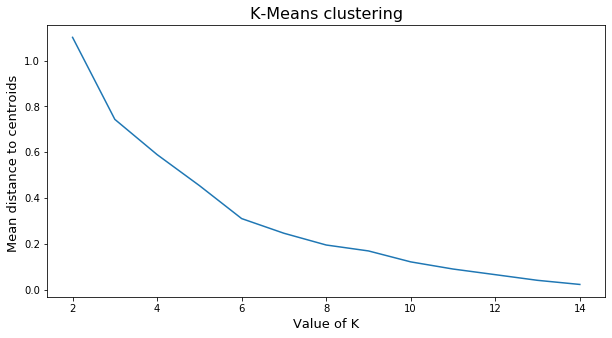

In [63]:
mean_dist=[]
sticks=[]
max_clust=15
#k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=12)
#k_means.fit(cluster_dataset)
#labels = k_means.labels_
#centroids = km.cluster_centers_

for i in range(2,max_clust):
    k_means = KMeans(init="k-means++", n_clusters = i, n_init=12)
    k_means.fit(cluster_datasetZ)
    labels = k_means.labels_
    centroids = k_means.cluster_centers_
    sum=0
    for j in range(labels.shape[0]):
        dist = np.linalg.norm(cluster_datasetZ[j]-centroids[labels[j]])
        sum = sum + dist
    mean_dist.append(sum/labels.shape[0])
    sticks.append(i)
mean_dist    
plt.figure(figsize=(10,5))
plt.plot(sticks,mean_dist)    
plt.xlabel("Value of K", size=13)
plt.ylabel("Mean distance to centroids ", size=13)
plt.title("K-Means clustering", size=16)
plt.savefig('clusters2.png')

In [64]:
kclusters = 6

k_means = KMeans(init="k-means++", n_clusters=kclusters, n_init=20)
k_means.fit(cluster_datasetZ)
labels = k_means.labels_
cdmx['label']=labels
centroids = k_means.cluster_centers_

In [65]:
cdmx['Population'] = pd.to_numeric(cdmx['Population'])
cdmx.dtypes
cdmx['Positive_covid-19'].sum()

48565

In [66]:
# create map
cdmx_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10.5, tiles='Stamen Terrain')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cdmx['latitude'], cdmx['longitude'], cdmx['Alcaldia'], cdmx['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(cdmx_map_clusters)
       
cdmx_map_clusters